In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math

In [43]:
# fetch dataset 
census_income_kdd = fetch_ucirepo(id=117) 
df=census_income_kdd.data.original

In [44]:
df_or = df

In [6]:
df.dtypes

AAGE           int64
ACLSWKR       object
ADTINK         int64
ADTOCC         int64
AHGA          object
AHRSPAY        int64
AHSCOL        object
AMARITL       object
AMJIND        object
AMJOCC        object
ARACE         object
AREORGN       object
ASEX          object
AUNMEM        object
AUNTYPE       object
AWKSTAT       object
CAPGAIN        int64
GAPLOSS        int64
DIVVAL         int64
FILESTAT      object
GRINREG       object
GRINST        object
HHDFMX        object
HHDREL        object
MARSUPWRT    float64
MIGMTR1       object
MIGMTR3       object
MIGMTR4       object
MIGSAME       object
MIGSUN        object
NOEMP          int64
PARENT        object
PEFNTVTY      object
PEMNTVTY      object
PENATVTY      object
PRCITSHP      object
SEOTR          int64
VETQVA        object
VETYN          int64
WKSWORK        int64
year           int64
income        object
dtype: object

In [7]:
df.describe()

,AAGE,ADTINK,ADTOCC,AHRSPAY,CAPGAIN,GAPLOSS,DIVVAL,MARSUPWRT,NOEMP,SEOTR,VETYN,WKSWORK,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [8]:
for columna in df.columns:
    print(f"Valores únicos en {columna}: {df[columna].unique()}")

Valores únicos en AAGE: [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
Valores únicos en ACLSWKR: [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
Valores únicos en ADTINK: [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
Valores únicos en ADTOCC: [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
Valores únicos en AHGA: [' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree

In [9]:

dtypes = df.dtypes

categorical_cols = []
numerical_cols = []

# Iterar sobre las columnas y clasificarlas según su tipo
for col, dtype in dtypes.items():
    if pd.api.types.is_numeric_dtype(dtype):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numerical_cols)

Columnas categóricas: ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'income']
Columnas numéricas: ['AAGE', 'ADTINK', 'ADTOCC', 'AHRSPAY', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'MARSUPWRT', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'year']


#### Variables numericas

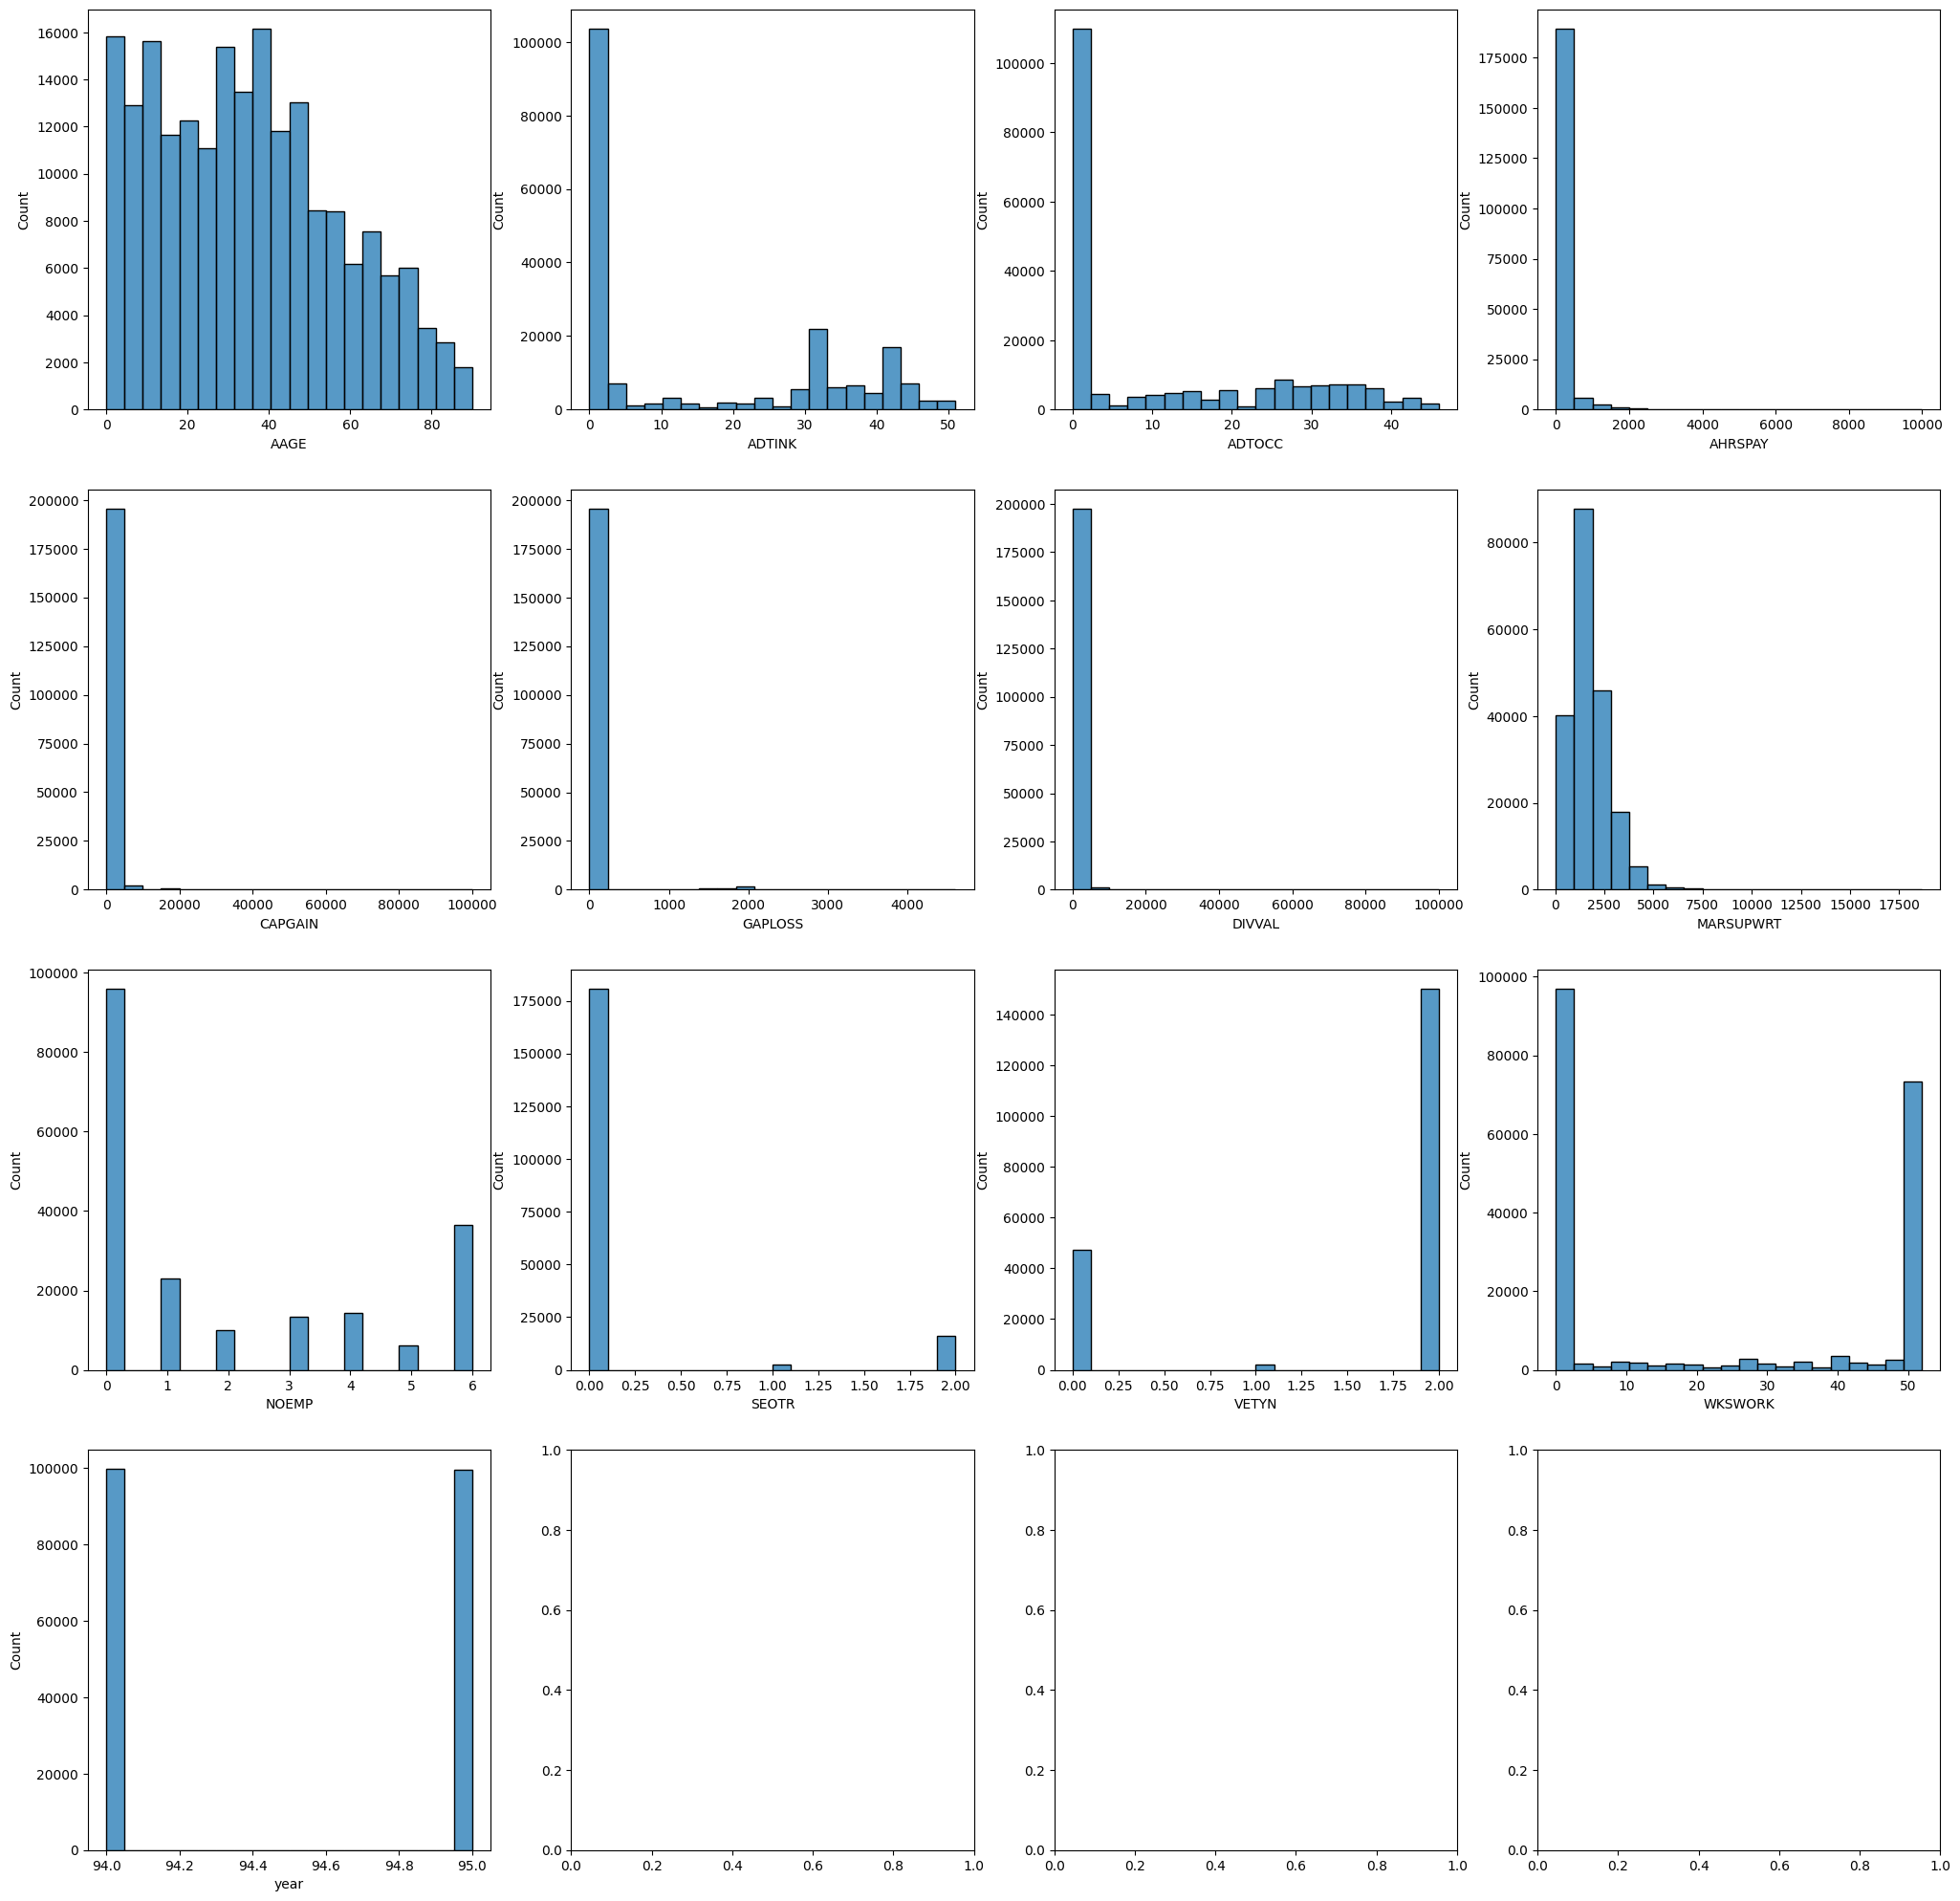

In [17]:
import math
a= math.floor(math.sqrt(len(numerical_cols)))+1

fig, axes = plt.subplots(a, a, figsize=(25,25))
axes = axes.flatten()
i = 0
for t in numerical_cols:
    ax = sns.histplot(data=df, x=t, bins=20,  ax=axes[i])
    i +=1

#### Variables categóricas

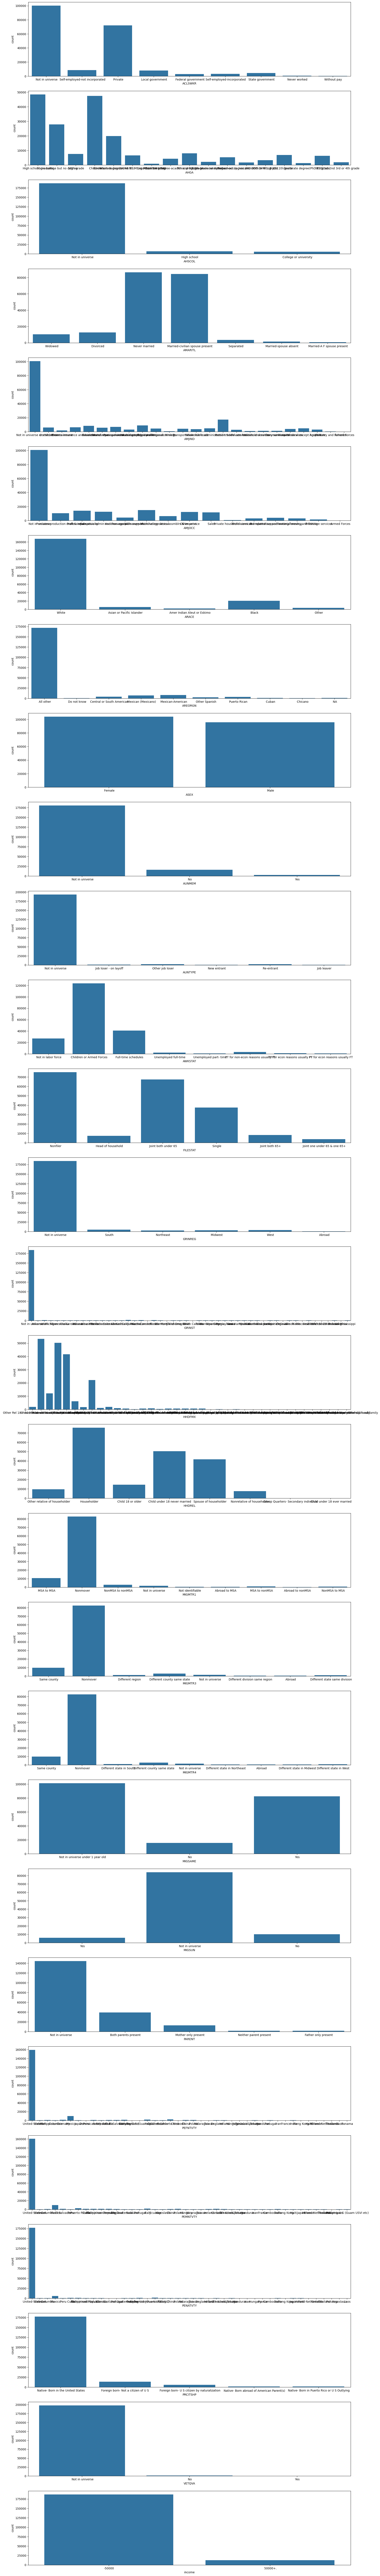

In [34]:
import math
a= math.floor(math.sqrt(len(categorical_cols)))+1

#fig, axes = plt.subplots(a, a, figsize=(25,25))
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(20,160))
axes = axes.flatten()
i = 0
for t in categorical_cols:
    ax = sns.countplot(x=t, data=df, ax=axes[i])
    i +=1

In [5]:
def tipo_variables(df):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    
    # Iterar sobre las columnas y clasificarlas según su tipo
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols

In [27]:
def plot_numerical(df):
    numerical_cols=tipo_variables(df)[0]
    a= math.floor(math.sqrt(len(numerical_cols)))+1
    fig, axes = plt.subplots(a, a, figsize=(25,25))
    axes = axes.flatten()
    i = 0
    for t in numerical_cols:
        ax = sns.histplot(data=df, x=t, bins=20,  ax=axes[i])
        i +=1

In [28]:
def plot_categorial(df):
    categorical_cols=tipo_variables(df)[1]
    a= math.floor(math.sqrt(len(categorical_cols)))+1
    #fig, axes = plt.subplots(a, a, figsize=(25,25))
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(20,160))
    axes = axes.flatten()
    i = 0
    for t in categorical_cols:
        ax = sns.countplot(x=t, data=df, ax=axes[i])
        i +=1

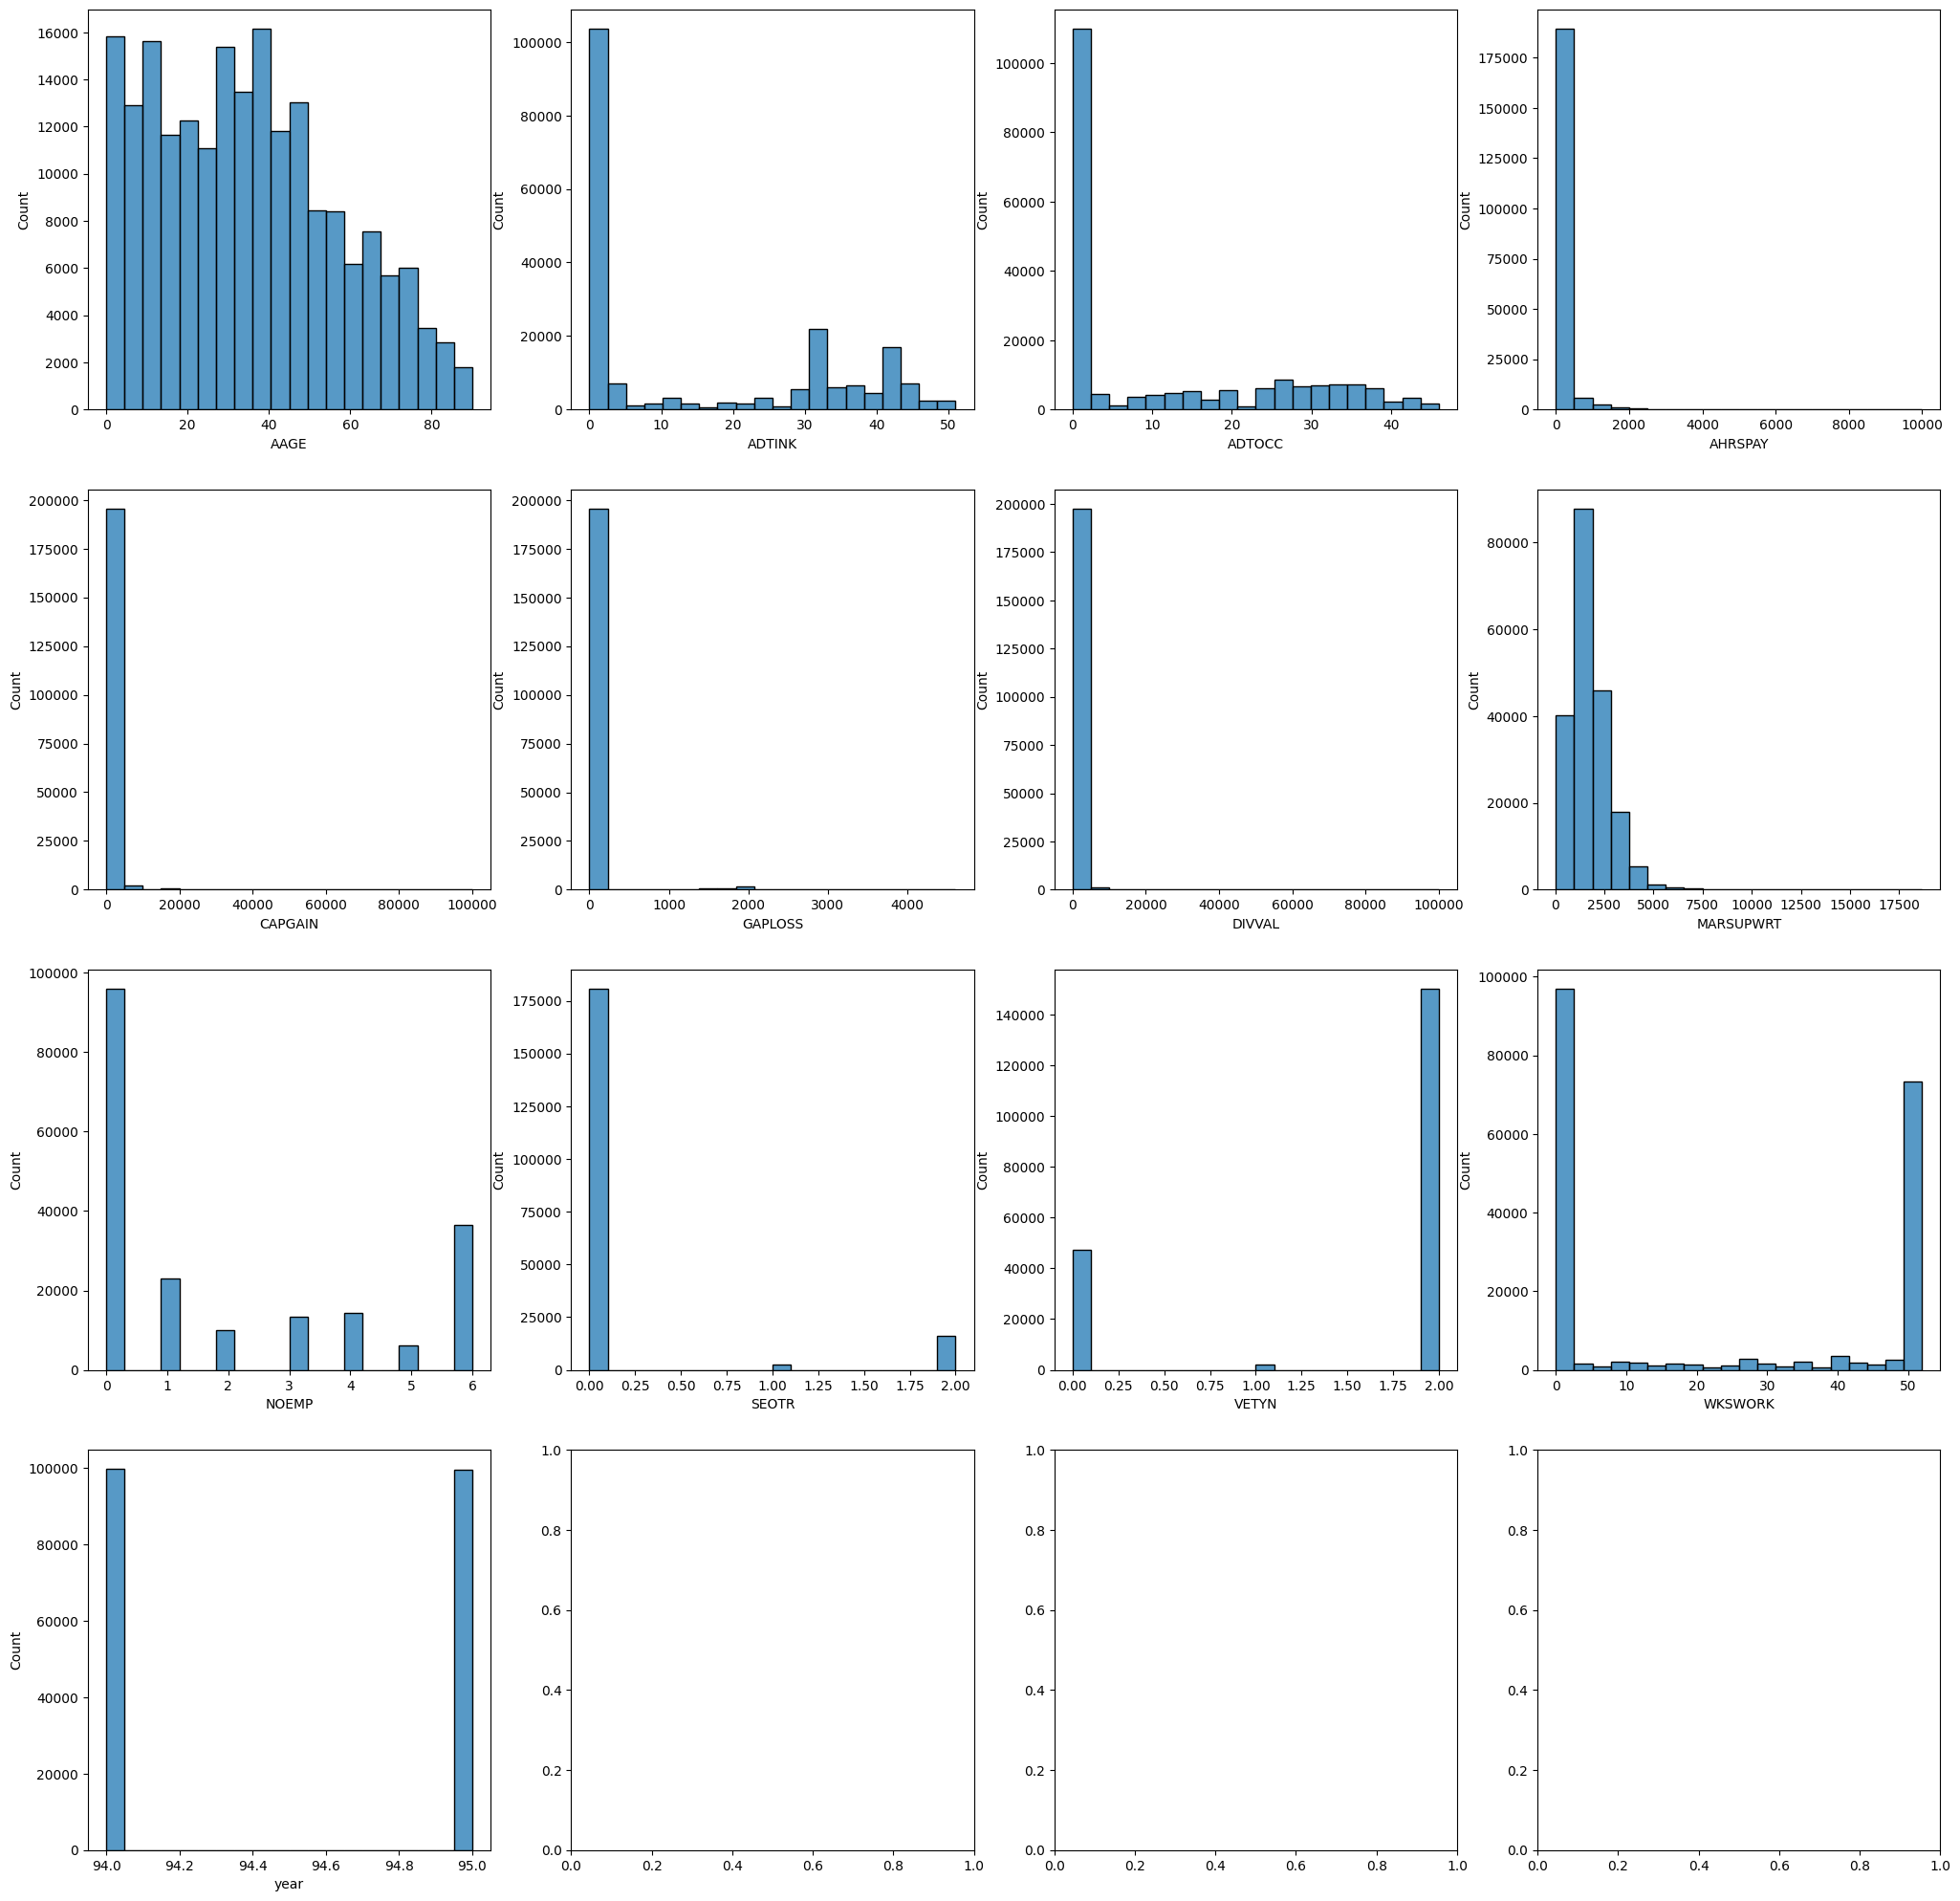

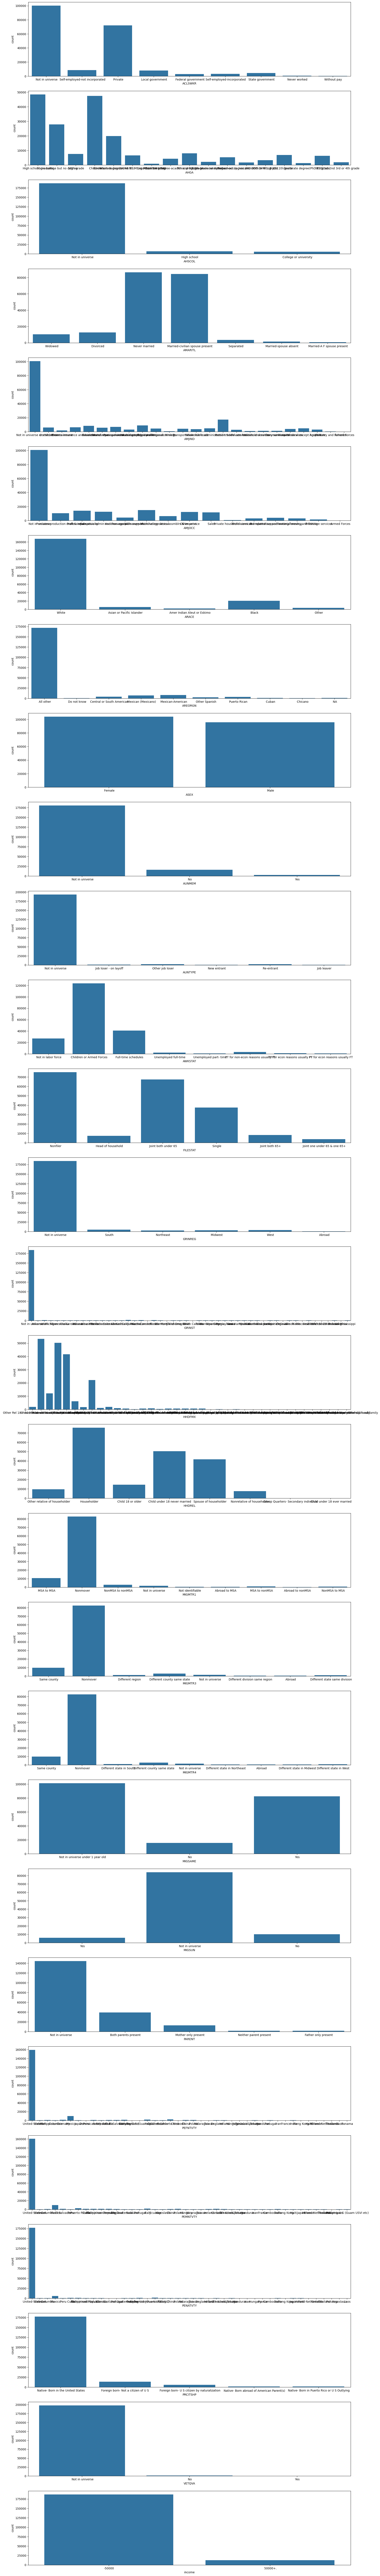

In [51]:
plot_numerical(df)
plot_categorial(df)
